### Цель материала

Научиться:
*  загружать и сохранять изображение с помощью библиотеки `opencv`;
*  выводить изображение на экран с помощью библиотеки `matplotlib`;
*  работать с изображением как с массивом.

### OpenCV
[OpenCV](https://opencv.org/) — крупнейшая библиотека для работы с изображениями и видео в Python и C++. С её помощью можно считывать визуальные материалы из файлов и сохранять их в любом формате. Библиотека также содержит функции, которые позволяют быстро и эффективно обрабатывать изображения (фильтры, изменение размеров и ориентации, обрезка и многое другое). Картинка представлена в библиотеке в виде многомерного массива `numpy.ndarray`, благодаря чему с ней можно работать, давая программе прямой доступ к значению каждого пикселя.

Важно: библиотека называется OpenCV, но устанавливать её нужно как `opencv-python`, а импортировать — как `cv2`.

### 1. Устанавливаем и импортируем необходимые библиотеки

In [ ]:
!pip install opencv-python
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import cv2
import matplotlib.pyplot as plt

### 2. Считываем изображение

In [ ]:
img = cv2.imread('Lenna.png')
img

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

В результате изображение считалось в виде массива целых чисел (от 0 до 255). По размеру массива можно увидеть, что размер изображения — 512 × 512 пикселей и у него есть три канала.

In [ ]:
print('Shape of an image:', img.shape)

Shape of an image: (512, 512, 3)


### 3. Выводим изображение

Выведем изображение на экран. Чтобы его корректно отобразить, нужно учесть, что библиотека `opencv` загружает (и сохраняет) каналы изображения в порядке __Blue — Green — Red (BGR)__, тогда как библиотека `matplotlib`, которую мы будем использовать, применяет стандартный порядок каналов __Red — Green —Blue (RGB)__.
Переставить каналы можно вручную (ведь изображение — это многомерный массив) или с помощью метода `cvtColor()` из библиотеки `opencv`.

Для вывода изображения воспользуемся методом `imshow()` из библиотеки `matplotlib`.

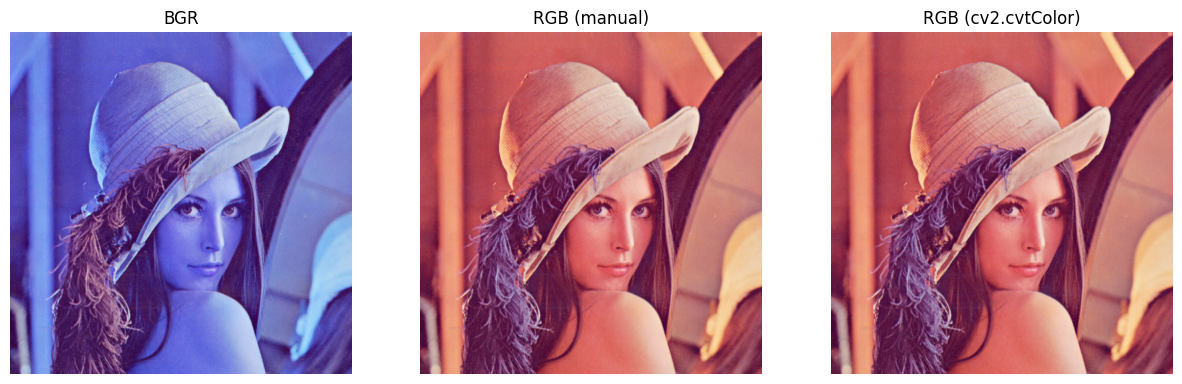

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].axis('off') # Выключаем отображение осей координат.
axs[0].set_title('BGR')

axs[1].imshow(img[:,:,[2, 1, 0]]) # Переставляем каналы в обратном порядке.
axs[1].axis('off')
axs[1].set_title('RGB (manual)')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Используем метод из библиотеки.
axs[2].imshow(img_rgb)
axs[2].axis('off')
axs[2].set_title('RGB (cv2.cvtColor)')

plt.show()

Изображение: Лина Соденберг / Playboy / [Wikipedia](https://ru.wikipedia.org/wiki/%D0%A4%D0%B0%D0%B9%D0%BB:Lenna.png)

### 4. Обрезаем изображение

Работая с изображением как с массивом, мы также можем работать со срезами, тем самым кадрируя картинку. Такая операция в компьютерном зрении называется __crop__.

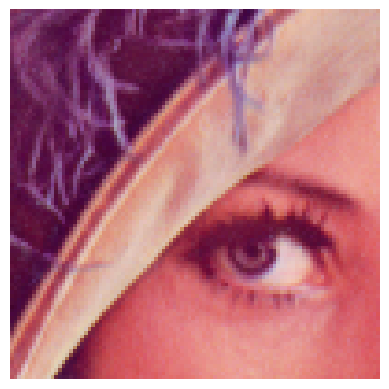

In [ ]:
img_cropped = img_rgb[200:300, 200:300, :]
plt.imshow(img_cropped)
plt.axis('off')
plt.show()

Изображение: Лина Соденберг / Playboy / [Wikipedia](https://ru.wikipedia.org/wiki/%D0%A4%D0%B0%D0%B9%D0%BB:Lenna.png)

### 5. Переводим изображение в чёрно-белое

Метод `cvtColor()` позволяет перевести изображение из цветного трёхканального в одноканальное чёрно-белое. Обратите внимание, что перевод изображения в оттенки серого не то же самое, что усреднение всех каналов.

Глаз человека воспринимает цвета не одинаково, а с разной интенсивностью, поэтому формула перевода выглядит следующим образом:

$$Gray = 0.2989 * Red + 0.5870 * Green + 0.1140 * Blue.$$

Shape of a gray-scale image: (512, 512)


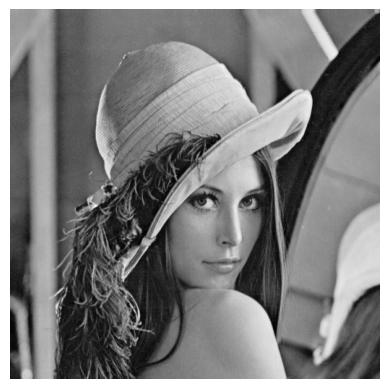

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print('Shape of a gray-scale image:', img_gray.shape)

plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

Изображение: Лина Соденберг / Playboy / [Wikipedia](https://ru.wikipedia.org/wiki/%D0%A4%D0%B0%D0%B9%D0%BB:Lenna.png)

### 6. Сохраняем изображение

Сохраним на компьютер два новых варианта изображения: чёрно-белое и обрезанное.

Важно: в переменной `img_cropped` обрезанное изображение хранится с порядком каналов RGB.

Метод `imwrite()` определит нужный формат изображения в зависимости от указанного расширения файла.

In [ ]:
cv2.imwrite('Lenna_gray.png', img_gray)
cv2.imwrite('Lenna_cropped.jpg', cv2.cvtColor(img_cropped, cv2.COLOR_RGB2BGR))

True